<a href="https://colab.research.google.com/github/mohdumarharis/Cheminformatics/blob/main/dissertation_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desertation Project Bioinformatics

In [ ]:
! pip install chembl_webresource_client

  Using cached chembl_webresource_client-0.10.8-py3-none-any.whl (55 kB)
  Using cached requests_cache-0.7.5-py3-none-any.whl (39 kB)
  Using cached url_normalize-1.4.3-py2.py3-none-any.whl (6.8 kB)
     |████████████████████████████████| 670 kB 9.8 MB/s 
  Using cached attrs-21.4.0-py2.py3-none-any.whl (60 kB)
  Created wheel for easydict: filename=easydict-1.10-py3-none-any.whl size=6496 sha256=891c46783a24861f54bffa9525799082da2b7a7e9812c9c4d875fc1b540f7faa
  Stored in directory: /root/.cache/pip/wheels/8d/d6/16/3fd964549d5c27d89d6c5fdb4306283ca55be1799f3d48a67b
Successfully built easydict


In [ ]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [ ]:
# Target search for monkey pox virus
target = new_client.target
target_query = target.search('polio virus')
targets = pd.DataFrame.from_dict(target_query)
targets

KeyboardInterrupt: ignored

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-08-06 22:23:35--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   159MB/s    in 0.5s    

2023-08-06 22:23:36 (159 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    -

In [ ]:
!pip install rdkit

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
import pandas as pd

In [ ]:
smiles_data=pd.read_csv('smiles_cancer.csv')

In [ ]:
smiles_data

,SMILES,Anticancer
0,CCCCC[C@H]1[C@H](O1)/C=C/C(C/C=C\\C/C=C\\CCCC(...,0
1,CC(=O)O[C@@H]1C[C@@H]2[C@](C=CC(=O)C2(C)C)([C@...,1
2,CN(C(=O)N)N=O,0
3,C1=CC=C2C(=C1)C(=CN2)C3=NC=CS3,0
4,C([C@@H]1[C@H]([C@H](C(O1)NC(=O)C[NH3+])O)O)OP...,0
...,...,...
26386,CCCCCCCCCCCCCCCCCCCCCCC(=O)N[C@@H](CO[C@H]1[C@...,0
26387,C[C@H](CCN)[C@H](C(=O)O)N,0
26388,CC/C=C\\C/C=C\\C/C=C\\C/C=C\\C/C=C\\C/C=C\\CCC...,0
26389,CCCCCCCCCCCCCCCCCCCCCCCCCC(=O)N[C@@H](COP(=O)(...,0


In [ ]:
first=smiles_data.iloc[0,0]

In [ ]:
first

'CCCCC[C@H]1[C@H](O1)/C=C/C(C/C=C\\\\C/C=C\\\\CCCC(=O)[O-])O'

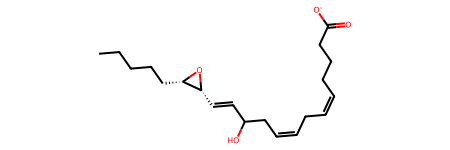

In [ ]:
Chem.MolFromSmiles(first)

In [ ]:


def lipinski(smiles, verbose=False):
    descriptors = []

    for i, elem in enumerate(smiles):
        mol = Chem.MolFromSmiles(elem)
        if mol is None:
            print(f"Invalid SMILES at index {i}: {elem}")
            continue

        desc = {
            "MW": Descriptors.MolWt(mol),
            "LogP": Descriptors.MolLogP(mol),
            "NumHDonors": Lipinski.NumHDonors(mol),
            "NumHAcceptors": Lipinski.NumHAcceptors(mol)
        }
        descriptors.append(desc)

    df = pd.DataFrame(descriptors)
    return df


In [ ]:
def lipinski_org(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
smiles_series = []

for i in smiles_data.SMILES.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles_series.append(cpd_longest)

smiles = pd.Series(smiles_series, name = 'canonical_smiles')

In [ ]:
mol_desc=lipinski_org(smiles_series)

[22:24:56] WARNING: not removing hydrogen atom without neighbors
[22:25:00] WARNING: not removing hydrogen atom without neighbors
[22:25:02] WARNING: not removing hydrogen atom without neighbors
[22:25:02] WARNING: not removing hydrogen atom without neighbors
[22:25:07] WARNING: not removing hydrogen atom without neighbors
[22:25:08] WARNING: not removing hydrogen atom without neighbors
[22:25:08] WARNING: not removing hydrogen atom without neighbors


In [ ]:
mol_desc

,MW,LogP,NumHDonors,NumHAcceptors
0,335.464,3.0640,1.0,4.0
1,436.592,6.2389,0.0,4.0
2,103.081,-0.3217,1.0,3.0
3,200.266,3.2914,1.0,2.0
4,285.169,-5.3635,4.0,8.0
...,...,...,...,...
26386,798.244,10.1179,6.0,8.0
26387,146.190,-0.6168,3.0,3.0
26388,1158.152,4.9552,5.0,23.0
26389,1354.635,6.9484,16.0,22.0


Calculating chemial fingerprint descriptors

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-08-06 22:25:44--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-08-06 22:25:44--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2023-08-06 22:25:45 (216 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-08-06 22:25:45--  https://github

In [ ]:
! unzip padel.zip


Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [ ]:
df3_selection=smiles_data.SMILES
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)


In [ ]:
# Run PaDEL-Descriptor
! cat molecule.smi | head -5


CCCCC[C@H]1[C@H](O1)/C=C/C(C/C=C\\C/C=C\\CCCC(=O)[O-])O
CC(=O)O[C@@H]1C[C@@H]2[C@](C=CC(=O)C2(C)C)([C@@H]3[C@@]1(C4=CC[C@H]([C@@]4(CC3)C)C5=COC=C5)C)C
CN(C(=O)N)N=O
C1=CC=C2C(=C1)C(=CN2)C3=NC=CS3
C([C@@H]1[C@H]([C@H](C(O1)NC(=O)C[NH3+])O)O)OP(=O)([O-])[O-]


In [ ]:
! cat molecule.smi | wc -l


26391


In [ ]:
! cat padel.sh


java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh


Streaming output truncated to the last 5000 lines.
	at org.openscience.cdk.ringsearch.AllRingsFinder.findAllRings(AllRingsFinder.java:136)
	at org.openscience.cdk.ringsearch.AllRingsFinder.findAllRings(AllRingsFinder.java:117)
	at org.openscience.cdk.smiles.smarts.SMARTSQueryTool.initializeMolecule(SMARTSQueryTool.java:360)
	... 10 more

Processing AUTOGEN_molecule_21398 in molecule.smi (21398/26391). Average speed: 0.34 s/mol.
Processing AUTOGEN_molecule_21399 in molecule.smi (21399/26391). Average speed: 0.34 s/mol.
Processing AUTOGEN_molecule_21400 in molecule.smi (21400/26391). Average speed: 0.34 s/mol.
Processing AUTOGEN_molecule_21401 in molecule.smi (21401/26391). Average speed: 0.34 s/mol.
Processing AUTOGEN_molecule_21402 in molecule.smi (21402/26391). Average speed: 0.34 s/mol.
Processing AUTOGEN_molecule_21403 in molecule.smi (21403/26391). Average speed: 0.34 s/mol.
Processing AUTOGEN_molecule_21404 in molecule.smi (21404/26391). Average speed: 0.34 s/mol.
Processing AUTOG

In [ ]:
df3_X = pd.read_csv('descriptors_output.csv')


In [ ]:

df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,anticancer
0,AUTOGEN_molecule_1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,AUTOGEN_molecule_3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,AUTOGEN_molecule_4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,AUTOGEN_molecule_5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,AUTOGEN_molecule_6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26386,AUTOGEN_molecule_26388,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
26387,AUTOGEN_molecule_26387,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
26388,AUTOGEN_molecule_26389,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
26389,AUTOGEN_molecule_26391,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
smiles_data

,SMILES,Anticancer
0,CCCCC[C@H]1[C@H](O1)/C=C/C(C/C=C\\C/C=C\\CCCC(...,0
1,CC(=O)O[C@@H]1C[C@@H]2[C@](C=CC(=O)C2(C)C)([C@...,1
2,CN(C(=O)N)N=O,0
3,C1=CC=C2C(=C1)C(=CN2)C3=NC=CS3,0
4,C([C@@H]1[C@H]([C@H](C(O1)NC(=O)C[NH3+])O)O)OP...,0
...,...,...
26386,CCCCCCCCCCCCCCCCCCCCCCC(=O)N[C@@H](CO[C@H]1[C@...,0
26387,C[C@H](CCN)[C@H](C(=O)O)N,0
26388,CC/C=C\\C/C=C\\C/C=C\\C/C=C\\C/C=C\\C/C=C\\CCC...,0
26389,CCCCCCCCCCCCCCCCCCCCCCCCCC(=O)N[C@@H](COP(=O)(...,0


In [ ]:
df3_X["anticancer"]=smiles_data.Anticancer

# Model Building

In [ ]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,anticancer
0,AUTOGEN_molecule_1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,AUTOGEN_molecule_3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,AUTOGEN_molecule_4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,AUTOGEN_molecule_5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,AUTOGEN_molecule_6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26386,AUTOGEN_molecule_26388,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
26387,AUTOGEN_molecule_26387,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
26388,AUTOGEN_molecule_26389,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
26389,AUTOGEN_molecule_26391,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from rdkit import Chem
from rdkit.Chem import AllChem
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
X = df3_X.drop(columns=['Name', 'anticancer'])
y = df3_X['anticancer']

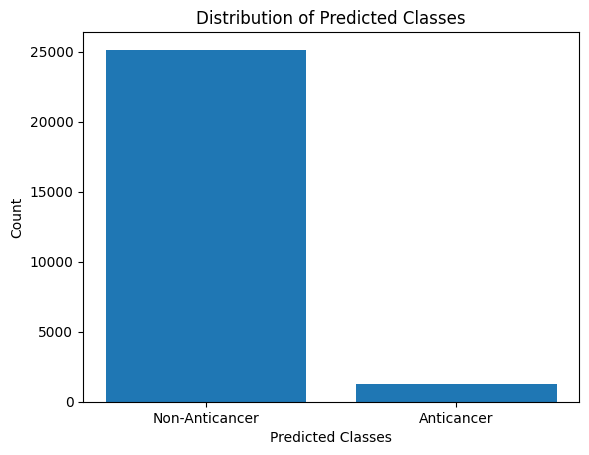

In [ ]:
# Plot a bar graph showing the distribution of predicted classes
unique_classes, class_counts = np.unique(y, return_counts=True)


plt.bar(unique_classes, class_counts)
plt.xticks(unique_classes, ['Non-Anticancer', 'Anticancer'])
plt.xlabel('Predicted Classes')
plt.ylabel('Count')
plt.title('Distribution of Predicted Classes')
plt.show()

In [ ]:
class_counts

array([25138,  1243])

In [ ]:
data = pd.concat([X, y], axis=1)
data.dropna(inplace=True)
X = data.drop(columns=['anticancer'])
y = data['anticancer']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define the deep learning model
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
np.isnan(X).any()

PubchemFP0      False
PubchemFP1      False
PubchemFP2      False
PubchemFP3      False
PubchemFP4      False
                ...  
PubchemFP876    False
PubchemFP877    False
PubchemFP878    False
PubchemFP879    False
PubchemFP880    False
Length: 881, dtype: bool

In [ ]:
np.isnan(X_train_scaled).any()

False

In [ ]:
X_train_scaled

array([[ 0.16250914,  0.32337978,  0.68552533, ..., -0.01686378,
         0.        ,  0.        ],
       [ 0.16250914,  0.32337978,  0.68552533, ..., -0.01686378,
         0.        ,  0.        ],
       [ 0.16250914,  0.32337978, -1.45873531, ..., -0.01686378,
         0.        ,  0.        ],
       ...,
       [ 0.16250914,  0.32337978,  0.68552533, ..., -0.01686378,
         0.        ,  0.        ],
       [ 0.16250914, -3.09233933, -1.45873531, ..., -0.01686378,
         0.        ,  0.        ],
       [ 0.16250914,  0.32337978, -1.45873531, ..., -0.01686378,
         0.        ,  0.        ]])

resampling

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Load and preprocess your dataset

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)




In [ ]:
# Train the model using the resampled data
model.fit(x_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10
1006/1006 [==============================] - 5s 5ms/step - loss: 0.5641 - accuracy: 0.6903 - val_loss: 0.7660 - val_accuracy: 0.3911
Epoch 2/10
1006/1006 [==============================] - 4s 4ms/step - loss: 0.4902 - accuracy: 0.7432 - val_loss: 0.5544 - val_accuracy: 0.6484
Epoch 3/10
1006/1006 [==============================] - 4s 4ms/step - loss: 0.4376 - accuracy: 0.7771 - val_loss: 0.4632 - val_accuracy: 0.7423
Epoch 4/10
1006/1006 [==============================] - 6s 6ms/step - loss: 0.3972 - accuracy: 0.8028 - val_loss: 0.4857 - val_accuracy: 0.7410
Epoch 5/10
1006/1006 [==============================] - 6s 6ms/step - loss: 0.3678 - accuracy: 0.8202 - val_loss: 0.4207 - val_accuracy: 0.8079
Epoch 6/10
1006/1006 [==============================] - 5s 5ms/step - loss: 0.3428 - accuracy: 0.8303 - val_loss: 0.4258 - val_accuracy: 0.7934
Epoch 7/10
1006/1006 [==============================] - 4s 4ms/step - loss: 0.3238 - accuracy: 0.8460 - val_loss: 0.3433 - val_accuracy:

In [ ]:
len(x_train_resampled)

40218

In [ ]:
# Evaluate the model on the original test data
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print('Test accuracy:', test_acc)

165/165 [==============================] - 0s 2ms/step - loss: 2.3755 - accuracy: 0.8050
Test accuracy: 0.8050028681755066


In [ ]:
# Train the model
#history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10
528/528 [==============================] - 3s 4ms/step - loss: 0.2364 - accuracy: 0.9498 - val_loss: 0.2117 - val_accuracy: 0.9498
Epoch 2/10
528/528 [==============================] - 2s 4ms/step - loss: 0.2050 - accuracy: 0.9529 - val_loss: 0.2032 - val_accuracy: 0.9502
Epoch 3/10
528/528 [==============================] - 2s 4ms/step - loss: 0.1936 - accuracy: 0.9533 - val_loss: 0.2053 - val_accuracy: 0.9495
Epoch 4/10
528/528 [==============================] - 2s 4ms/step - loss: 0.1925 - accuracy: 0.9531 - val_loss: 0.2037 - val_accuracy: 0.9498
Epoch 5/10
528/528 [==============================] - 3s 5ms/step - loss: 0.1851 - accuracy: 0.9533 - val_loss: 0.2069 - val_accuracy: 0.9493
Epoch 6/10
528/528 [==============================] - 3s 6ms/step - loss: 0.1826 - accuracy: 0.9537 - val_loss: 0.2106 - val_accuracy: 0.9495
Epoch 7/10
528/528 [==============================] - 3s 6ms/step - loss: 0.1792 - accuracy: 0.9541 - val_loss: 0.2071 - val_accuracy: 0.9491
Epoch 

In [ ]:
# Evaluate the model
#test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
#print('Test accuracy:', test_acc)

165/165 [==============================] - 0s 2ms/step - loss: 0.2175 - accuracy: 0.9528
Test accuracy: 0.9528141021728516


In [ ]:
y_test

18210    0
428      0
5341     0
20270    0
11379    0
        ..
24113    0
3530     0
4422     0
604      0
4151     0
Name: anticancer, Length: 5277, dtype: int64

In [ ]:
# Print training history
print("Training history:", history.history)

Training history: {'loss': [0.23642517626285553, 0.20502139627933502, 0.19361354410648346, 0.19251476228237152, 0.18507836759090424, 0.18260090053081512, 0.17920026183128357, 0.17993859946727753, 0.17471328377723694, 0.17264358699321747], 'accuracy': [0.9497719407081604, 0.9528520107269287, 0.9532666206359863, 0.9531481266021729, 0.9533258080482483, 0.9537404775619507, 0.9540958404541016, 0.9534443020820618, 0.9540958404541016, 0.9539181590080261], 'val_loss': [0.21165834367275238, 0.20316751301288605, 0.20533165335655212, 0.20368357002735138, 0.20689429342746735, 0.21057184040546417, 0.20711052417755127, 0.21753676235675812, 0.21479575335979462, 0.22464151680469513], 'val_accuracy': [0.9497749209403992, 0.9502487778663635, 0.9495380520820618, 0.9497749209403992, 0.9493011236190796, 0.9495380520820618, 0.9490641951560974, 0.9493011236190796, 0.9495380520820618, 0.9495380520820618]}


In [ ]:
# Make predictions
predictions = model.predict(X_test_scaled)

165/165 [==============================] - 0s 1ms/step


In [ ]:
# Convert predictions to binary classes (0 or 1)
predicted_classes = np.round(predictions)


In [ ]:
len(predicted_classes)

5277

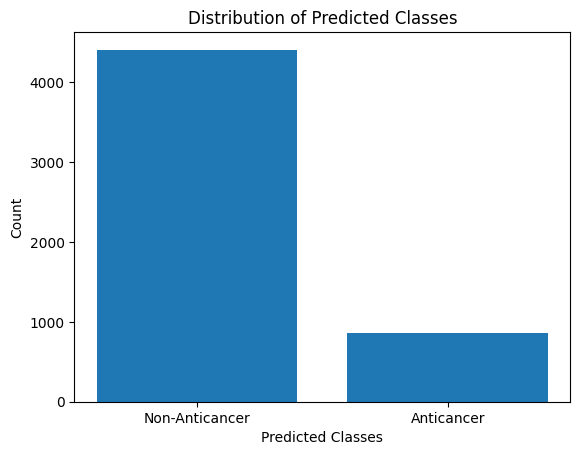

In [ ]:
import matplotlib.pyplot as plt

# Plot a bar graph showing the distribution of predicted classes
unique_classes, class_counts = np.unique(predicted_classes, return_counts=True)


plt.bar(unique_classes, class_counts)
plt.xticks(unique_classes, ['Non-Anticancer', 'Anticancer'])
plt.xlabel('Predicted Classes')
plt.ylabel('Count')
plt.title('Distribution of Predicted Classes')
plt.show()

In [ ]:
class_counts

array([4410,  867])

In [ ]:
# Assess performance metrics (e.g., accuracy, precision, recall, F1-score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, predicted_classes)
precision = precision_score(y_test, predicted_classes)
recall = recall_score(y_test, predicted_classes)
f1 = f1_score(y_test, predicted_classes)

In [ ]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

Accuracy: 0.8050028425241614
Precision: 0.049596309111880045
Recall: 0.17338709677419356
F1-Score: 0.07713004484304933


# Applying linear and logic regressions

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(x_train_resampled, y_train_resampled)

LinearRegression()

In [ ]:
# Make predictions
logreg_predictions = logreg_model.predict(X_test_scaled)
linear_predictions = linear_model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
logreg_predicted_classes = np.round(logreg_predictions)
linear_predicted_classes = np.round(linear_predictions)

In [ ]:



# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print()

evaluate_model(y_test, logreg_predicted_classes, "Logistic Regression")
#evaluate_model(y_test, linear_predicted_classes, "Linear Regression")







Metrics for Logistic Regression:
Accuracy: 0.8272
Precision: 0.0699
Recall: 0.2177
F1-Score: 0.1059

